# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df= pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [8]:
def gen(x):
    if x=='Male':
        return 0
    elif x=='Female':
        return 1

In [9]:
df['Gender']=df['Gender'].apply(gen)

In [10]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [11]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

In [12]:
df.drop(columns='User ID',inplace=True)

In [13]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

<Axes: >

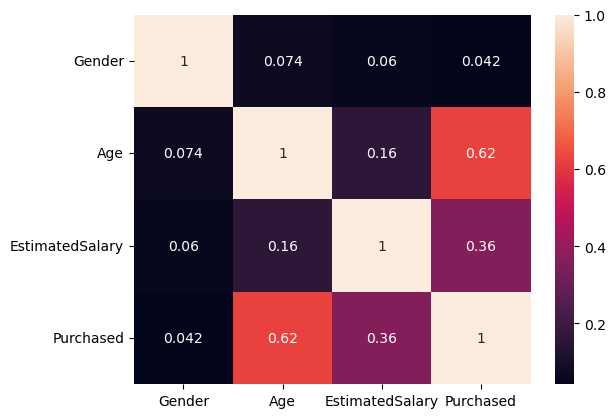

In [14]:
sns.heatmap(df.corr(),annot=True)

### Plot a countplot of gender with respect to purchased

<Axes: xlabel='Gender', ylabel='count'>

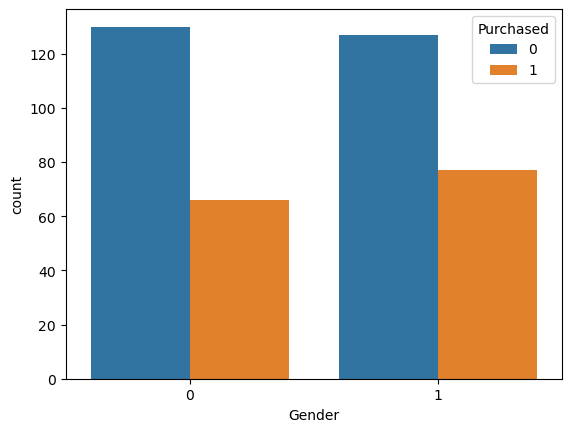

In [15]:
sns.countplot(x='Gender',data=df,hue='Purchased')

### Plot a displot of Age

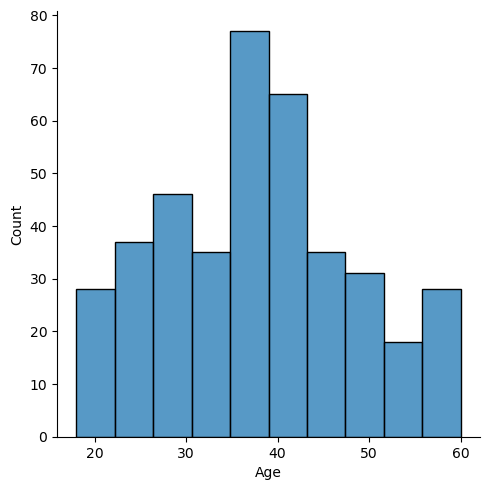

In [16]:
sns.displot(x='Age',data=df)

### Plot pairplot of the dataset

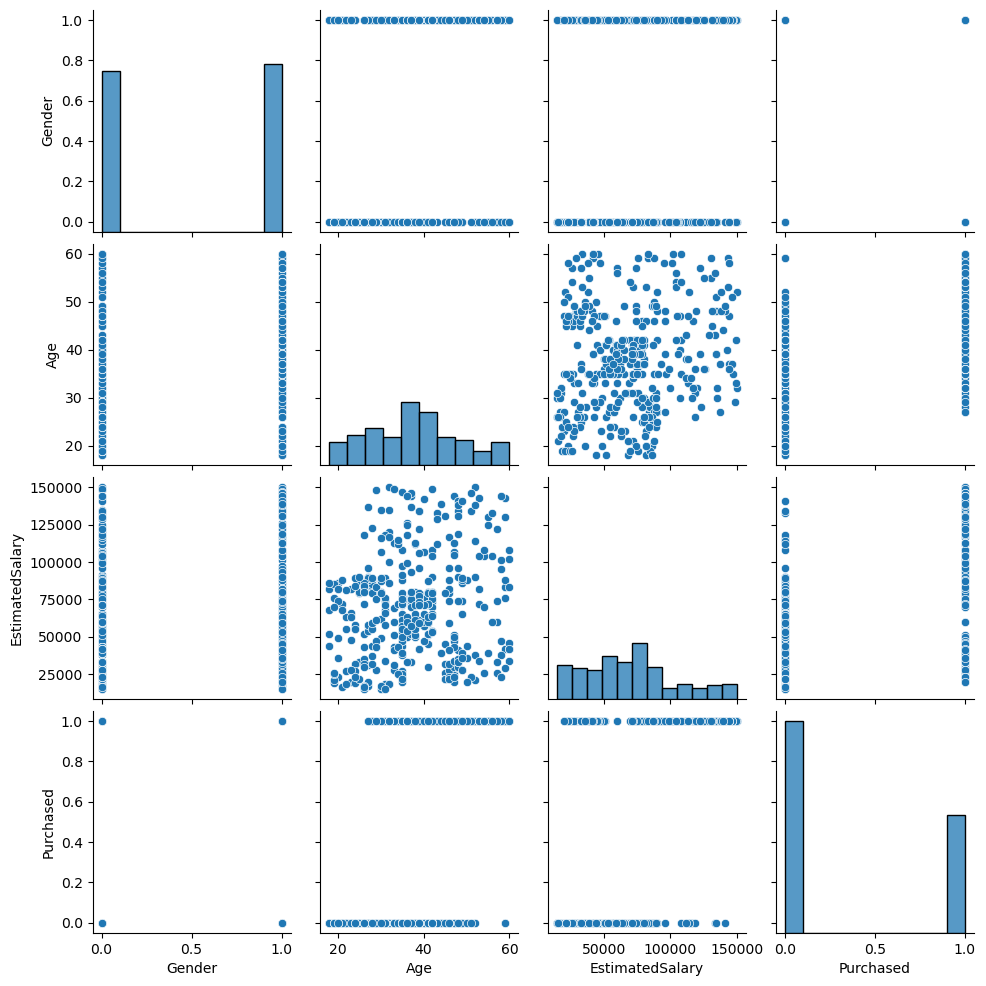

In [17]:
sns.pairplot(df)

## Data Preprocessing

### Split the dataset into input and target variables

In [18]:
X=df.drop(columns='Purchased')
y=df['Purchased']

### Scale the data using StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [22]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Check shape of X_train and X_test

In [25]:
x_train.shape

(320, 3)

In [26]:
x_test.shape

(80, 3)

## ML Models

### Logistic Regression Classifier

In [27]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [28]:
model=LogisticRegression()

In [29]:
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
print('Score of our trained model is:',model.score(x_train,y_train))

Score of our trained model is: 0.85625


In [31]:
y_pred=model.predict(x_test)

In [32]:
print('Accuracy score of our prediction is:',metrics.accuracy_score(y_test,y_pred))

Accuracy score of our prediction is: 0.8375


In [33]:
print('Confusion matrix is: ')
print(metrics.confusion_matrix(y_test,y_pred))
print('Classification Report is:')
print(metrics.classification_report(y_test,y_pred))

Confusion matrix is: 
[[45  4]
 [ 9 22]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        49
           1       0.85      0.71      0.77        31

    accuracy                           0.84        80
   macro avg       0.84      0.81      0.82        80
weighted avg       0.84      0.84      0.83        80



In [34]:
print('Mean of cross validation score is:',cross_val_score(model,X,y,cv=10).mean())

Mean of cross validation score is: 0.8225


### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model=RandomForestClassifier(n_estimators=20)

In [37]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [38]:
print('Score of our trained model is:',rf_model.score(x_train,y_train))

Score of our trained model is: 0.99375


In [39]:
rf_y_pred=rf_model.predict(x_test)

In [40]:
print('Accuaracy score of our prediction is:',metrics.accuracy_score(y_test,rf_y_pred))

Accuaracy score of our prediction is: 0.8875


In [41]:
print('Confussion matrix is:\n', metrics.confusion_matrix(y_test, rf_y_pred))

Confussion matrix is:
 [[46  3]
 [ 6 25]]


In [42]:
print('Classification report is:\n', metrics.classification_report(y_test, rf_y_pred))

Classification report is:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.89      0.81      0.85        31

    accuracy                           0.89        80
   macro avg       0.89      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



In [43]:
print("Mean of Cross Validation Score : ", cross_val_score(rf_model, X, y, cv=10).mean())

Mean of Cross Validation Score :  0.8775000000000001


### Support Vector Machine

In [44]:
from sklearn.svm import SVC

In [45]:
svc_model=SVC()

In [46]:
svc_model.fit(x_train,y_train)

SVC()

In [47]:
print('Score of our trained model is',svc_model.score(x_train,y_train))

Score of our trained model is 0.9125


In [48]:
svc_y_pred=svc_model.predict(x_test)

In [49]:
print('Accuarcy score of our prediction is:',metrics.accuracy_score(y_test,y_pred))

Accuarcy score of our prediction is: 0.8375


In [50]:
print('Confusion matrix is:\n',metrics.confusion_matrix(y_test,svc_y_pred))


Confusion matrix is:
 [[46  3]
 [ 5 26]]


In [51]:
print('Classification report is :\n',metrics.classification_report(y_test,svc_y_pred))

Classification report is :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.90      0.84      0.87        31

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [52]:
print('Mean of Cross validation score is:',cross_val_score(svc_model,X,y,cv=10).mean())

Mean of Cross validation score is: 0.905


### Assign cross val scores of all models into a dataframe

In [53]:
df1 = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'], 
             'Score': [cross_val_score(model, X,y, cv = 10).mean(), cross_val_score(rf_model, X, y, cv=10).mean(), cross_val_score(svc_model, X, y, cv = 9).mean()]
             })
df1.sort_values(by=['Score'],ascending=False)

,Model,Score
2,Support Vector Machine,0.902076
1,Random Forest,0.872500
0,Logistic Regression,0.822500


***

## Deploy the model with highest score using Tkinter

In [54]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [55]:
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will output to an entry box in Tkinter

In [72]:
def getpred():
    gender1 = gender.get()
    age1 = age.get()
    salary1 = float(salary.get())
    
    if gender1 == 'Male':
        gender1 = 0
    else :
        gender1 = 1
        
        
    scaled_inp = scaler.fit_transform([[gender1, age1, salary1]])
    
    pred = svc_model.predict(scaled_inp)
    
    result.delete(0,END)
    
    if pred[0]==0:
        result.insert(0, 'Purchased')
    else:
        result.insert(0, 'Not Purchased')
        

### Create Tkinter window with all necessary entryboxes and labels

In [ ]:
window = Tk()
window.geometry('400x400')
window.title('Customer Behaviour')

titlelabel = Label(window, text = 'Customer Behaviour Classification', bg = 'blue').pack(fill= 'both')    
Label(window).pack()

genderlabel = Label(window, text = 'Gender').pack()
gender = Combobox(window)
gender['values'] = ('Male', 'Female')
# gender.current(0)
gender.set('-Select-')
gender.pack()

Label(window).pack()

agelabel = Label(window, text = 'Age (18 - 60)').pack()
age = Entry(window)
age.pack()

Label(window).pack()

salarylabel = Label(window, text = 'Estimated Salary (Range [15000 - 150000])').pack() 
salary = Entry(window)
salary.pack()

Label(window).pack()

button = Button(window, text = "Get Prediction", bd = '3', command = getpred)
button.pack()

Label(window).pack()

result = Entry(window)
result.pack()


window.mainloop()

C:\Users\jibin\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


***

# <span style = "color:green;font-size:40px"> Great Job! </span>